<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Analytics_Vidhya/Loan_Prediction_Analytics_Vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importando dataset e checando primeiras linhas de dados

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Entendendo os dados

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
teste = df.groupby('Gender')
teste['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,4643.473214,3585.381488,210.0,2661.5,3583.0,4606.5,19484.0
Male,489.0,5446.460123,6185.789262,150.0,2917.0,3865.0,5923.0,81000.0


Checando quantidade de dados por área

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Checando distribuição de dados por Renda

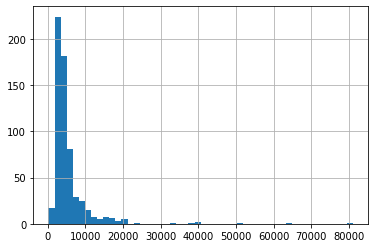

In [ ]:
df['ApplicantIncome'].hist(bins=50)

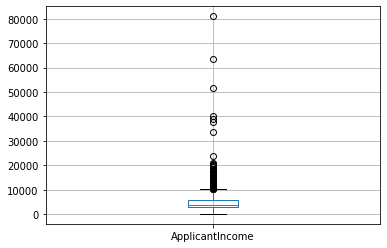

In [ ]:
df.boxplot(column='ApplicantIncome');

Checando se o nível de escolaridade influencia, mas não há diferença significativa

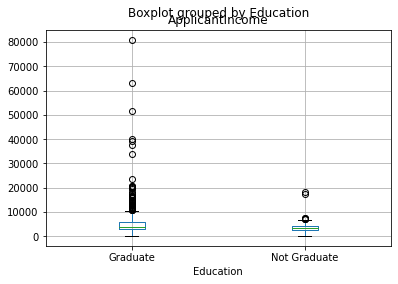

In [ ]:
df.boxplot(column='ApplicantIncome', by='Education')

Checando distribuição de valores de empréstimos concedidos

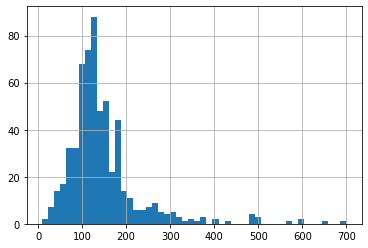

In [ ]:
df['LoanAmount'].hist(bins=50);

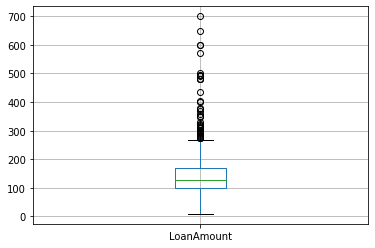

In [ ]:
df.boxplot(column='LoanAmount')

In [ ]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Esse cálculo permite encontrar a probabilidade de conseguir empréstimo de acordo com histórico de crédito

In [ ]:
temp2 = df.pivot_table(values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789




---
Análise em paralelo para entender cálculo do temp2
Sem Credit_History, 7 de 89 pessoas conseguiram empréstimo, o que representa 0.078652 (7,9%)

In [ ]:
temp2 = df.pivot_table(values='Loan_Status', index='Credit_History', aggfunc = lambda x: x.map({'Y':1,'N':0}).sum())
temp2

,Loan_Status
Credit_History,
0.0,7
1.0,378


In [ ]:
temp2 = df.pivot_table(values='Loan_Status', index='Credit_History', aggfunc = lambda x: x.map({'Y':1,'N':0}).count())
temp2

,Loan_Status
Credit_History,
0.0,89
1.0,475




---



Plotando gráficos que mostra a quantidade absoluta e percentual de qtde de pessoas que conseguiram empréstimo de acordo com o histórico de crédito

Text(0.5, 1.0, 'Probability of getting loan by credit history')

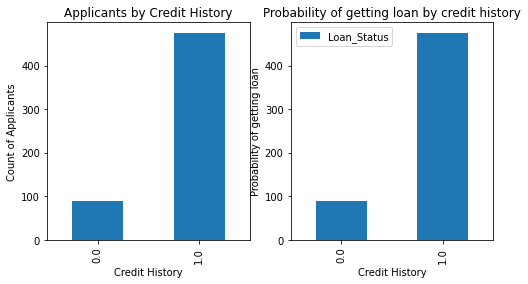

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122) 
temp2.plot(kind='bar', ax= ax2)
ax2.set_xlabel("Credit History")
ax2.set_ylabel("Probability of getting loan")
ax2.set_title('Probability of getting loan by credit history')


In [ ]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


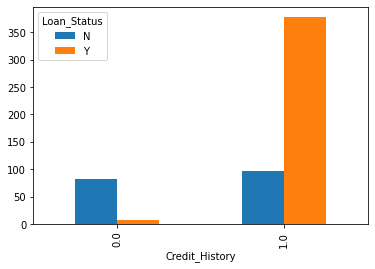

In [ ]:
temp3.plot(kind='bar')

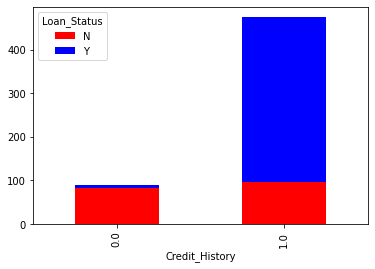

In [ ]:
temp3.plot(kind='bar', stacked=True, color=['red','blue'])

Adicionando a variável gênero à análise

In [ ]:
temp4 = pd.crosstab([df['Credit_History'], df['Gender']] , df['Loan_Status'])
temp4

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

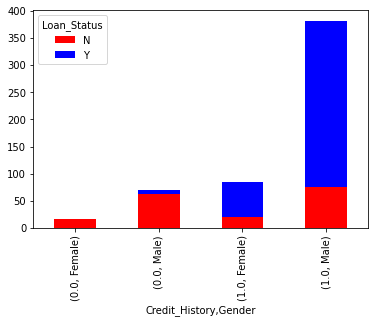

In [ ]:
temp4.plot(kind='bar', stacked=True, color=['red','blue'])

Apesar das análises acima existem pontos a ser tratados antes de pensar em criar um modelo:


1.   Tratar valores nulos
2.   Tratar Outliers
3.   Tratar campos não-numéricos




**Tratar valores nulos**

In [ ]:
df.apply(lambda x: sum(x.isnull()), axis=0) #axis por padrão é 0

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checando a resultados do dataset onde a coluna Self_employed apenas tem valores nulos

In [ ]:
df[df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Como a maioria dos resultados é No, vamos preencher os valores nulos por No

In [ ]:
df['Self_Employed'].fillna('No', inplace = True)

Agora não traz mais valores nulos

In [ ]:
df[df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [ ]:
def fage(x):
  '''
  Define function to return value of this pivot_table
  '''
  return table.loc[x['Self_Employed'], x['Education']]

In [ ]:
df[df['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [ ]:
df.iloc[0]

Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome           0
LoanAmount                NaN
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

Aplicamos o valor da mediana  de acordo com as variáveis Self Employed e Education nos campos que estavam nulos

In [ ]:
df['LoanAmount'][df['LoanAmount'].isnull()] = df[df['LoanAmount'].isnull()].apply(fage, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.iloc[0]

Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome           0
LoanAmount                130
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Tratar Outliers**
Ao invés de eliminar de cara os outliers podemos nesse caso transformar em escala logarítmica e ver o resultado

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


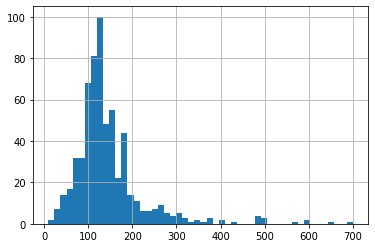

In [ ]:
df['LoanAmount'].hist(bins=50)

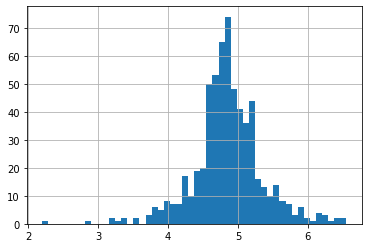

In [ ]:
df['LoanAmount_log'].hist(bins=50)

Também podemos fazer essa transformação com a renda dos solicitantes

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


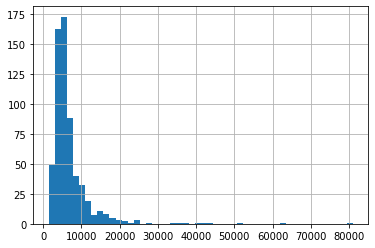

In [ ]:
df['TotalIncome'].hist(bins=50)

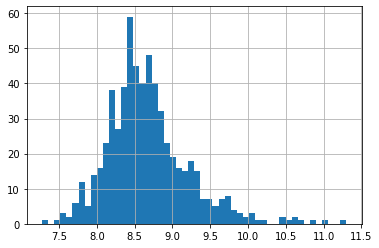

In [ ]:
df['TotalIncome_log'].hist(bins=50)